<!--BOOK_INFORMATION-->
*This notebook contains an excerpt from the <a href="http://shop.oreilly.com/product/0636920034919.do">Python Data Science Handbook</a> by Jake VanderPlas; the content is available on <a href="https://github.com/jakevdp/PythonDataScienceHandbook">GitHub</a>.*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

Adapded for class presentation by Claudio Sartori - University of Bologna

# Introducing Scikit-Learn

<a href="http://scikit-learn.org">Scikit-Learn</a>
- package that provides efficient versions of a large number of common algorithms
- clean, uniform, and streamlined API
- very useful and complete online documentation.
    - once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward
    
## Contents

- *Introduction* to Scikit-Learn
- *Data representation* in Scikit-Learn


## Data Representation in Scikit-Learn

### Data as table

- a two-dimensional grid of data
    - rows represent individual elements of the data set
    - columns represent quantities related to each of these elements

- Example: [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)
    - analyzed by Ronald Fisher in 1936
    - the dataset is already in your folder, there are two files `iris.csv` and `iris.names`
        - explore them as texts (you can load directly them as text using any notebook environment or a text editor)

### Look at the data and try to understand: 
1. if it is a `csv` file or other
1. for `csv`, what is the *separator* character (`,`,`;`,`\t`, ...)
1. for `csv`, is there a *header*? it is a first row containing column names
1. if there is no header, look for reasonable names, e.g. for *UCI* a `.names` file
1. if there is no header, look at the documentation of `read_csv` to see how to specify column names
1. try to understand if the dataset is supervised, and what is the *target class*


### Load this dataset in the form of a Pandas ``DataFrame`` 

In [2]:
import pandas as pd

- Suggestion: assign the pathname to a variable `url` (it can be used both for local files or external url)
- You can consider `pd.read_csv()` https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
- set the appropriate parameters, in particular check if you need to set the column names and the separator
- name your dataframe as `df`

--> Insert your code in new cell below

In [3]:
url = 'iris.csv'
names = ['sepal length', 'sepal width', 'petal length','petal width', 'class']
df = pd.read_csv(url, sep=',', names=names)

Show column names

--> insert your code in cell  below (from now on this direction will be omitted)

In [4]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

- each row refers to a single observed flower
    - the number of rows is the total number of flowers in the dataset.
    - *sample*: a single row
    - ``n_samples``: number of rows

- each column refers to a piece of information that describes each sample
    - *feature*: a single column
    ``n_features``: the number of columns
        - each column has a data type: number (continuous), boolean, discrete (nominal or ordinal, represented with integers or strings)

Show number of samples and number of features in `df` (hint: you can use the attribute `shape` of the dataframe)

In [5]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 150 rows and 5 columns


Show portion of data with the `head()` method of dataframe

In [6]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Show synthetic description

The **describe** method of pandas dataframes gives a short summary

Examine in the documentation if there are interesting options in the method

In [7]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Are there *missing values*? How could we see it from the description?

### Show histograms for all numeric values 
Use the `DataFrame.hist` method of Pandas. You can set the `figsize` parameter to adjust size

array([[<Axes: title={'center': 'sepal length'}>,
        <Axes: title={'center': 'sepal width'}>],
       [<Axes: title={'center': 'petal length'}>,
        <Axes: title={'center': 'petal width'}>]], dtype=object)

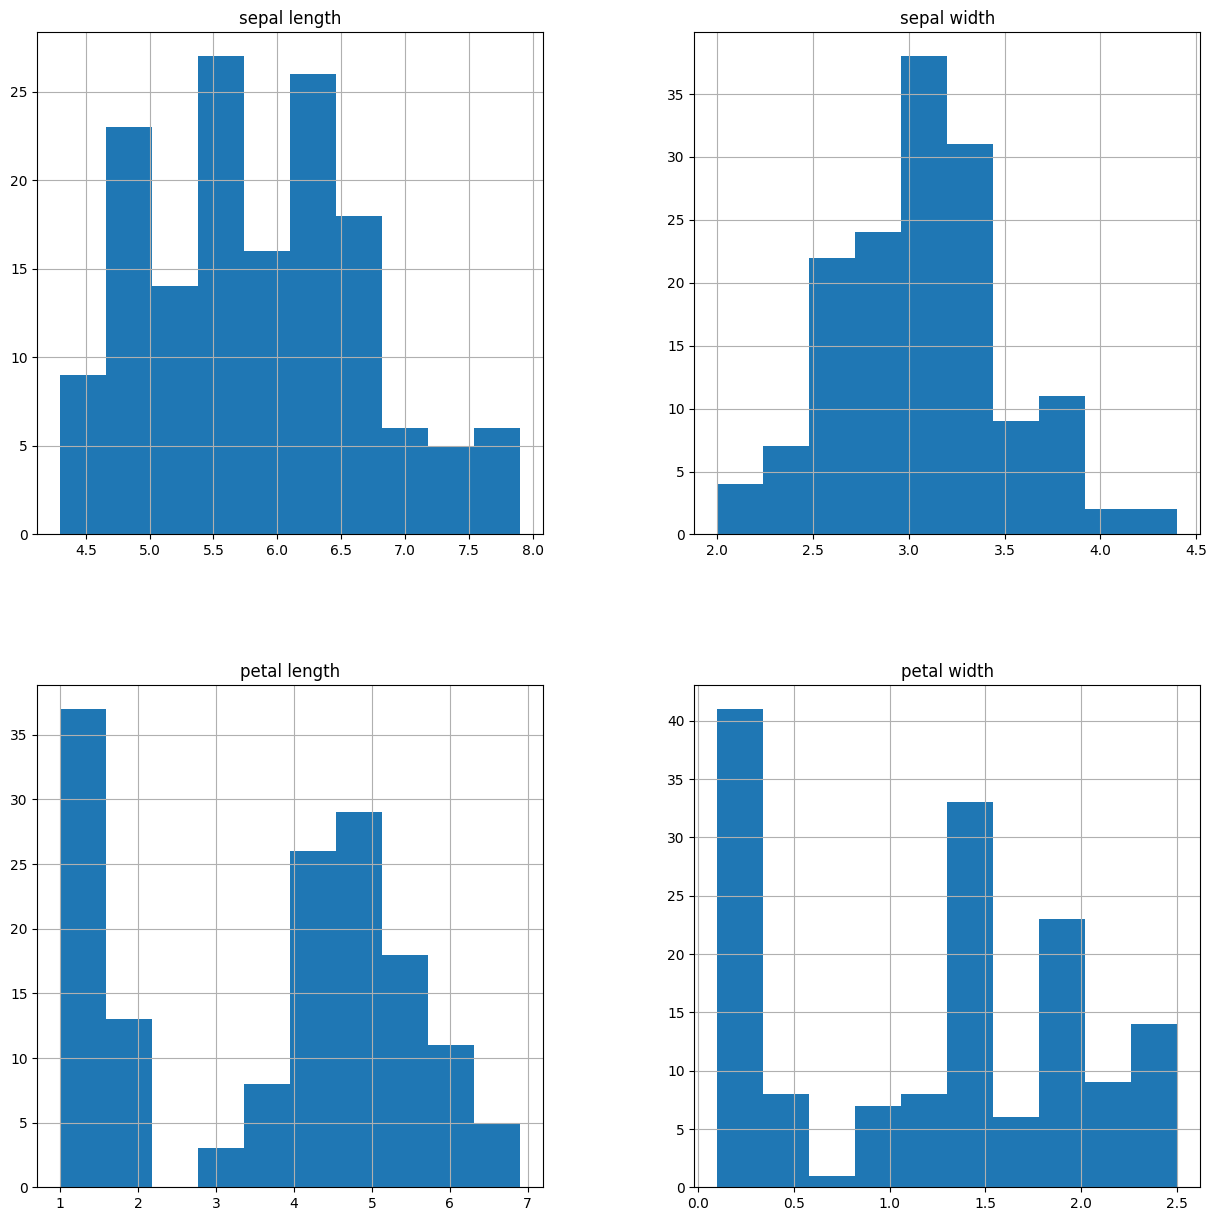

In [8]:
df.hist(figsize=(15,15))

Is there anything to observe? balanced distributions? skewed distributions? outliers?

## Pairplot
The `pairplot` of the *Seaborn* library is a powerful data exploration tool. It shows a plot of pairs of numeric attributes, and may represent as color the attribute chosen as class (the `hue` parameter). In this specific case the high number of attributes makes the representation not very clear (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb))

Import `seaborn` giving it the 'nickname' `sns`

Use df as argument to the `pairplot` method of Seaborn, specifying also `hue = '...'` and `diag_kind='kde'` (try also other options)

### Visualization

For a deeper exploration use Seaborn (see [Visualization With Seaborn](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb)) to visualize the data

Below we need to prepare the environment for plotting information on the dataset.

2. import `seaborn` giving it the 'nickname' `sns`
3. call the `pairplot` function of `seaborn` on the `iris` dataset, with parameters 
    - `hue = 'class'`, this sets the meaning of the color in the plot of the points of the dataset
    - `height = 2`, this sets the size of the plots

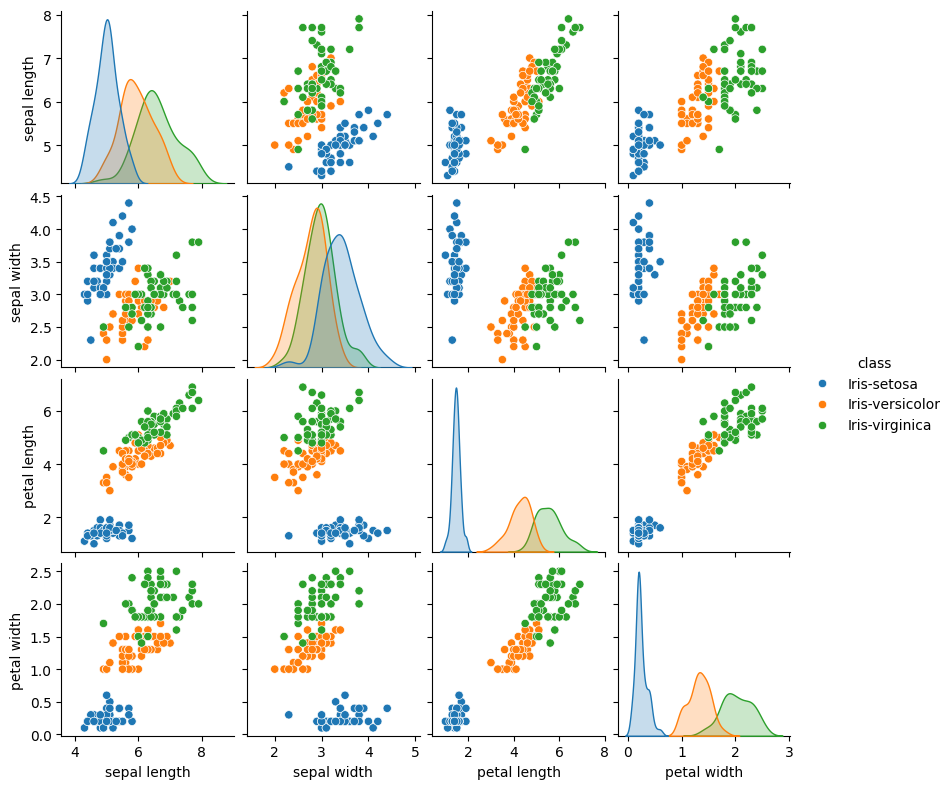

In [10]:
import seaborn as sns
sns.pairplot(df,hue='class', height=2)